# Predicción de Suscripción a Depósito a Plazo Fijo - Campaña Telefónica

### Introduccion
  Las entidades bancarias buscan implementar estrategias más efectivas para incrementar la contratación de sus productos financieros, optimizando simultáneamente la eficiencia de sus campañas de marketing. En este contexto, el presente proyecto se centra en la aplicación de técnicas de Machine Learning sobre datos históricos recopilados durante los últimos tres años, con el objetivo de desarrollar modelos predictivos capaces de estimar la probabilidad de que un cliente contrate un determinado producto. Estos modelos permitirán optimizar la toma de decisiones comerciales, maximizar el retorno de la inversión y reducir los costos operativos

### Objetivo
Desarrollar un modelo predictivo de Machine Learning que identifique con precisión qué clientes tienen mayor probabilidad de suscribir un depósito a plazo fijo durante la próxima campaña telefónica, permitiendo una asignación eficiente de recursos y maximizando el retorno de inversión, asegurando un AUC-ROC > 0.75 en validación.


# Analisis y procesamiento de Datos


## Importacion de librerias


In [673]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date


# Scikit-learn

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report, roc_curve, 
                            auc, roc_auc_score)

from joblib import dump

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


## Cargar datos

In [674]:
data_test = pd.read_csv("../data/dataset_marketing_test.csv")
data_train = pd.read_csv("../data/dataset_marketing_train.csv")
print(f"\n Dimensiones del conjunto de entrenamiento: {data_train.shape}")
print(f" Dimensiones del conjunto de prueba: {data_test.shape}")



 Dimensiones del conjunto de entrenamiento: (32652, 17)
 Dimensiones del conjunto de prueba: (8536, 17)


## 1. Explorar datos iniciales
Informacion General de los datos

El primer paso es entender la estructura de nuestros datos. Necesitamos saber tamaño , tipo de datos , registros ausentes o duplicados 

In [675]:
print("============== Primeras 5 filas ================")
print(data_train.head()) 
print("============= Últimas 5 filas ====================")
print(data_test.tail())


============== Primeras 5 filas ================
   edad       empleo   estado            educacion   impago hipoteca prestamo tipo_contacto  mes dia_semana  contactos_actual  contactos_anterior resultado_anterior  tasa_var_empleo_3m  euribor_3m  ipc_1m target
0    26   management   single    university.degree       no       no       no     telephone  jun        mon                 3                   0        nonexistent                 1.4       4.865  94.465     no
1    42   technician  married  professional.course  unknown       no       no     telephone  jun        mon                 9                   0        nonexistent                 1.4       4.865  94.465     no
2    30       admin.  married    university.degree       no       no       no     telephone  jun        mon                 2                   0        nonexistent                 1.4       4.865  94.465     no
3    55   technician  married             basic.9y       no       no       no     telephone  jun       

In [676]:
print("======== Informacion general del Dataframe =========")
data_train.info()

======== Informacion general del Dataframe =========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32652 entries, 0 to 32651
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                32652 non-null  int64  
 1   empleo              32652 non-null  object 
 2   estado              32652 non-null  object 
 3   educacion           32652 non-null  object 
 4   impago              32652 non-null  object 
 5   hipoteca            32652 non-null  object 
 6   prestamo            32652 non-null  object 
 7   tipo_contacto       32652 non-null  object 
 8   mes                 32652 non-null  object 
 9   dia_semana          32652 non-null  object 
 10  contactos_actual    32652 non-null  int64  
 11  contactos_anterior  32652 non-null  int64  
 12  resultado_anterior  32652 non-null  object 
 13  tasa_var_empleo_3m  32652 non-null  float64
 14  euribor_3m          32652 non-null  float64
 15  

In [677]:
print("=========== Resumen estadistico de las variables de entrenamiento ======== \n")
data_train.describe(include="all")

=========== Resumen estadistico de las variables de entrenamiento ======== 



,edad,empleo,estado,educacion,impago,hipoteca,prestamo,tipo_contacto,mes,dia_semana,contactos_actual,contactos_anterior,resultado_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m,target
count,32652.000000,32652,32652,32652,32652,32652,32652,32652,32652,32652,32652.000000,32652.000000,32652,32652.000000,32652.000000,32652.000000,32652
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,3,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,jul,thu,NaN,NaN,nonexistent,NaN,NaN,NaN,no
freq,NaN,8575,19383,10240,26520,17584,26897,25552,6863,7146,NaN,NaN,27474,NaN,NaN,NaN,28655
mean,39.930081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.595461,0.193281,NaN,-0.117987,3.393421,93.463533,NaN
std,10.592293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.819542,0.500932,NaN,1.658776,1.787415,0.601256,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,-3.400000,0.634000,92.201000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,-1.800000,1.313000,92.893000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,NaN,-0.100000,4.474000,93.444000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,1.400000,4.962000,93.918000,NaN


In [678]:
print("=========== Valores nulos en TRAIN ==========")
print(data_train.isnull().sum())

print("\n=========== Valores nulos en TEST ==========")
print(data_test.isnull().sum())

=========== Valores nulos en TRAIN ==========
edad                  0
empleo                0
estado                0
educacion             0
impago                0
hipoteca              0
prestamo              0
tipo_contacto         0
mes                   0
dia_semana            0
contactos_actual      0
contactos_anterior    0
resultado_anterior    0
tasa_var_empleo_3m    0
euribor_3m            0
ipc_1m                0
target                0
dtype: int64

=========== Valores nulos en TEST ==========


edad                  0
empleo                0
estado                0
educacion             0
impago                0
hipoteca              0
prestamo              0
tipo_contacto         0
mes                   0
dia_semana            0
contactos_actual      0
contactos_anterior    0
resultado_anterior    0
tasa_var_empleo_3m    0
euribor_3m            0
ipc_1m                0
target                0
dtype: int64


In [679]:
print(f'Número de valores duplicados train: {data_train.duplicated().sum()}')
print(f'Número de valores duplicados test: {data_test.duplicated().sum()}')


Número de valores duplicados train: 1553
Número de valores duplicados test: 242


Podemos observar que nuestro dataset de entrenamiento contiene mas de 32,652  registros distribuidos en 17 columnas sin valores nulos. En la datos estadisticos inicial, en nuestra variable objetivo vemos que el  el 87.7% (28,655) de los clientes rechazó el producto. 
 
Por otro lado la edad media de los clientes es de 39,9 años con predominio de profesionales administrativos ,casado, con formación universitaria y sin historial de impagos. Las campañas concentran contactos en julio (21.1%) y jueves (21.9%), mayoritariamente por celular. Variables económicas como Euribor (3.39% promedio) e IPC (93.46) muestran estabilidad macroeconómica durante el período observado. La media de 2.6 contactos por cliente sugiere estrategias de persistencia moderada, con casos extremos de 43 contactos evidenciando esfuerzos de retención.

Por ultimoi se identificaron 1.553 duplicados en los datos de entrenamiento, lo cual  su eliminación es obligatoria para evitar sesgos de sobreajuste antes del modelado predictivo.

## 2.Visualizacion de datos

In [680]:

cat_cols = data_train.select_dtypes(include='object').columns.tolist()
num_cols = data_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\n============== TIPOS DE VARIABLES ================")
print(f"Variables categóricas: {cat_cols}")
print(f"Variables numéricas: {num_cols}")

print("\n============== VALORES ÚNICOS POR COLUMNA ================")
for col in data_train.columns:
    unique_vals = data_train[col].nunique()
    print(f"\n{col}: {unique_vals} valores únicos")
    if unique_vals < 15:
        print(f"  Valores: {data_train[col].unique()}")



============== TIPOS DE VARIABLES ================
Variables categóricas: ['empleo', 'estado', 'educacion', 'impago', 'hipoteca', 'prestamo', 'tipo_contacto', 'mes', 'dia_semana', 'resultado_anterior', 'target']
Variables numéricas: ['edad', 'contactos_actual', 'contactos_anterior', 'tasa_var_empleo_3m', 'euribor_3m', 'ipc_1m']

============== VALORES ÚNICOS POR COLUMNA ================

edad: 78 valores únicos

empleo: 12 valores únicos
  Valores: ['management' 'technician' 'admin.' 'blue-collar' 'housemaid' 'services'
 'unemployed' 'retired' 'self-employed' 'unknown' 'entrepreneur' 'student']

estado: 4 valores únicos
  Valores: ['single' 'married' 'divorced' 'unknown']

educacion: 8 valores únicos
  Valores: ['university.degree' 'professional.course' 'basic.9y' 'basic.4y'
 'high.school' 'unknown' 'basic.6y' 'illiterate']

impago: 3 valores únicos
  Valores: ['no' 'unknown' 'yes']

hipoteca: 3 valores únicos
  Valores: ['no' 'yes' 'unknown']

prestamo: 3 valores únicos
  Valores: ['

### 2.1 Distribución de variables numéricas

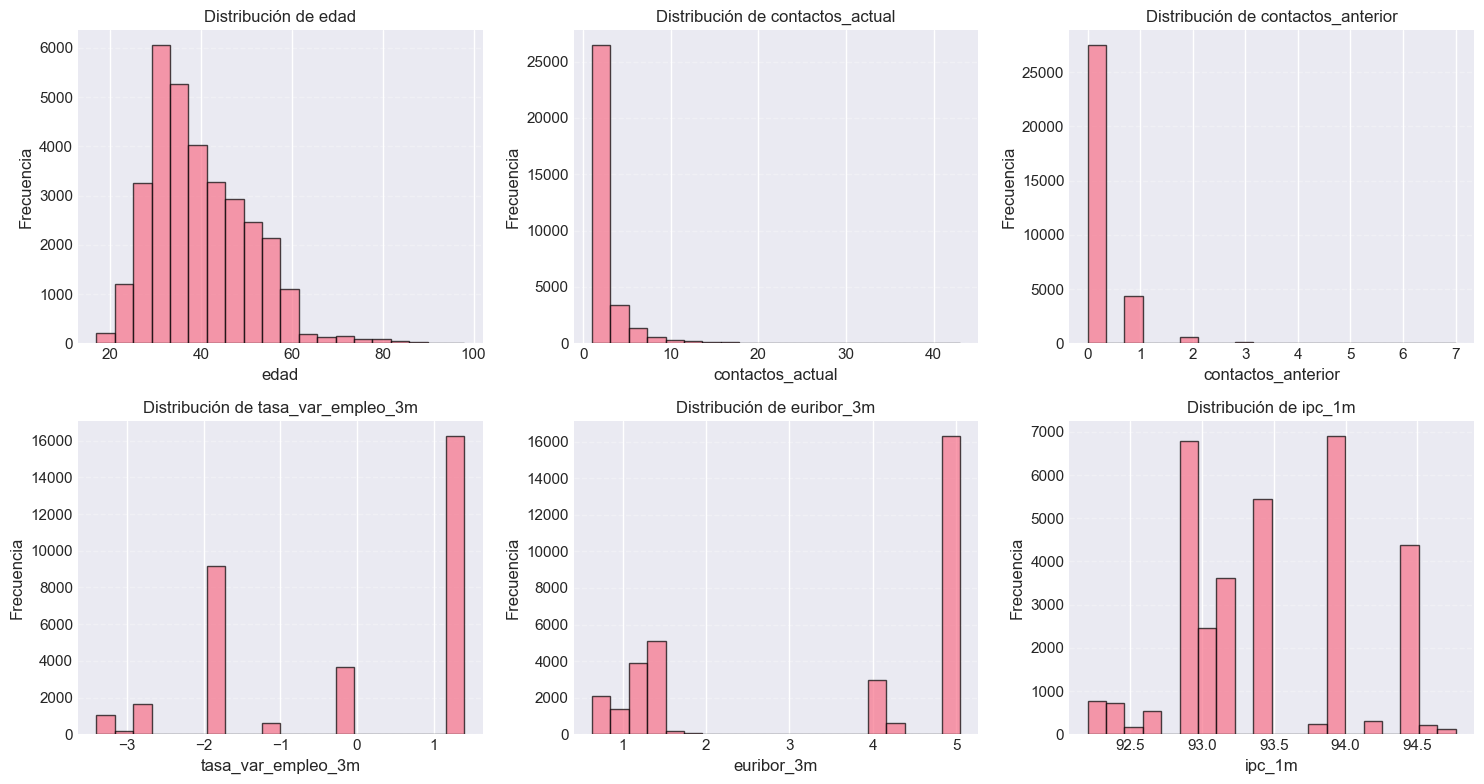

In [681]:
import math

import math
#Número de columnas numéricas
n_cols = len(num_cols)

# Definir filas y columnas del subplot
n_rows = math.ceil(n_cols / 3)
n_cols_subplot = 3

fig, axes = plt.subplots(n_rows, n_cols_subplot, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Para iterar fácilmente

for i, col in enumerate(num_cols):
    axes[i].hist(
        data_train[col],
        bins=20,
        edgecolor='black',
        alpha=0.7
    )
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Para finalizar el análisis de estos datos, comprobemos la correlación entre la variable objetivo y las variables numéricas.Se calculó la matriz de correlación y se generó un mapa de calor de para visualizar e identificar de forma gráfica las relaciones entre las variables y el target.

In [682]:
# Convertir target a numérico para análisis
data_train['target_num'] = data_train['target'].map({'yes': 1, 'no': 0})
data_test['target_num'] = data_test['target'].map({'yes': 1, 'no': 0})
# Ahora calculamos la correlación de todas las numéricas con el target
data_train.select_dtypes(include = 'number').corr()

,edad,contactos_actual,contactos_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m,target_num
edad,1.000000,0.004703,0.027858,-0.003474,0.010134,-0.007459,0.028119
contactos_actual,0.004703,1.000000,-0.090097,0.175341,0.158721,0.162101,-0.073607
contactos_anterior,0.027858,-0.090097,1.000000,-0.396401,-0.422963,-0.215296,0.187926
tasa_var_empleo_3m,-0.003474,0.175341,-0.396401,1.000000,0.971059,0.790356,-0.272110
euribor_3m,0.010134,0.158721,-0.422963,0.971059,1.000000,0.705716,-0.272612
ipc_1m,-0.007459,0.162101,-0.215296,0.790356,0.705716,1.000000,-0.139390
target_num,0.028119,-0.073607,0.187926,-0.272110,-0.272612,-0.139390,1.000000


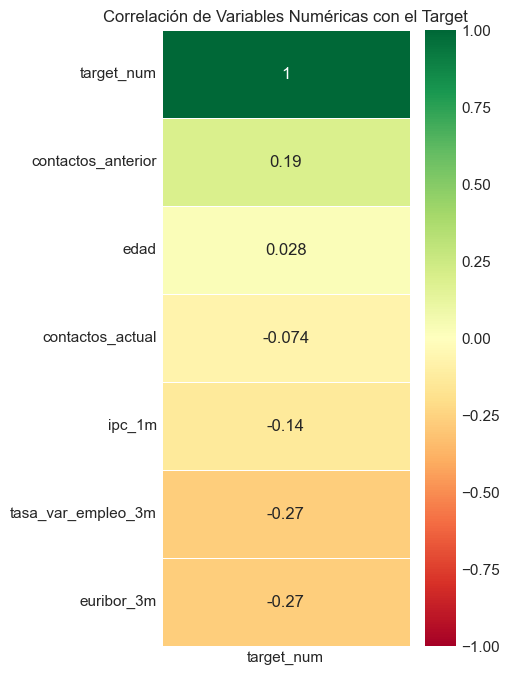

In [683]:
# Seleccionar solo columnas numéricas + target
corr_data = data_train[num_cols + ['target_num']].corr()

# Ordenar por correlación con el target
target_corr = corr_data[['target_num']].sort_values(by='target_num', ascending=False)

# Mapa de calor
plt.figure(figsize=(4, 8))
sns.heatmap(
    target_corr,
    annot=True,
    cmap='RdYlGn',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title('Correlación de Variables Numéricas con el Target')
plt.show()

El mapa de calor evidencia que la variable contactos_anteriores presenta la mayor correlación positiva con la contratación (0,19), indicando que un mayor historial de contactos previos se asocia con una mayor probabilidad de aceptación del crédito. La edad muestra una correlación prácticamente nula (0,025), lo que sugiere una influencia lineal limitada en la decisión de contratación. Por otro lado, contactos_actual presenta una relación negativa débil (−0,081), lo que podría indicar efectos de saturación en campañas intensivas. Las variables macroeconómicas ipc_1m, tasa_var_empleo_3m y euribor_3m muestran correlaciones negativas moderadas, destacando una menor propensión a contratar en contextos económicos adversos. 

Distribucion de variables categoricas

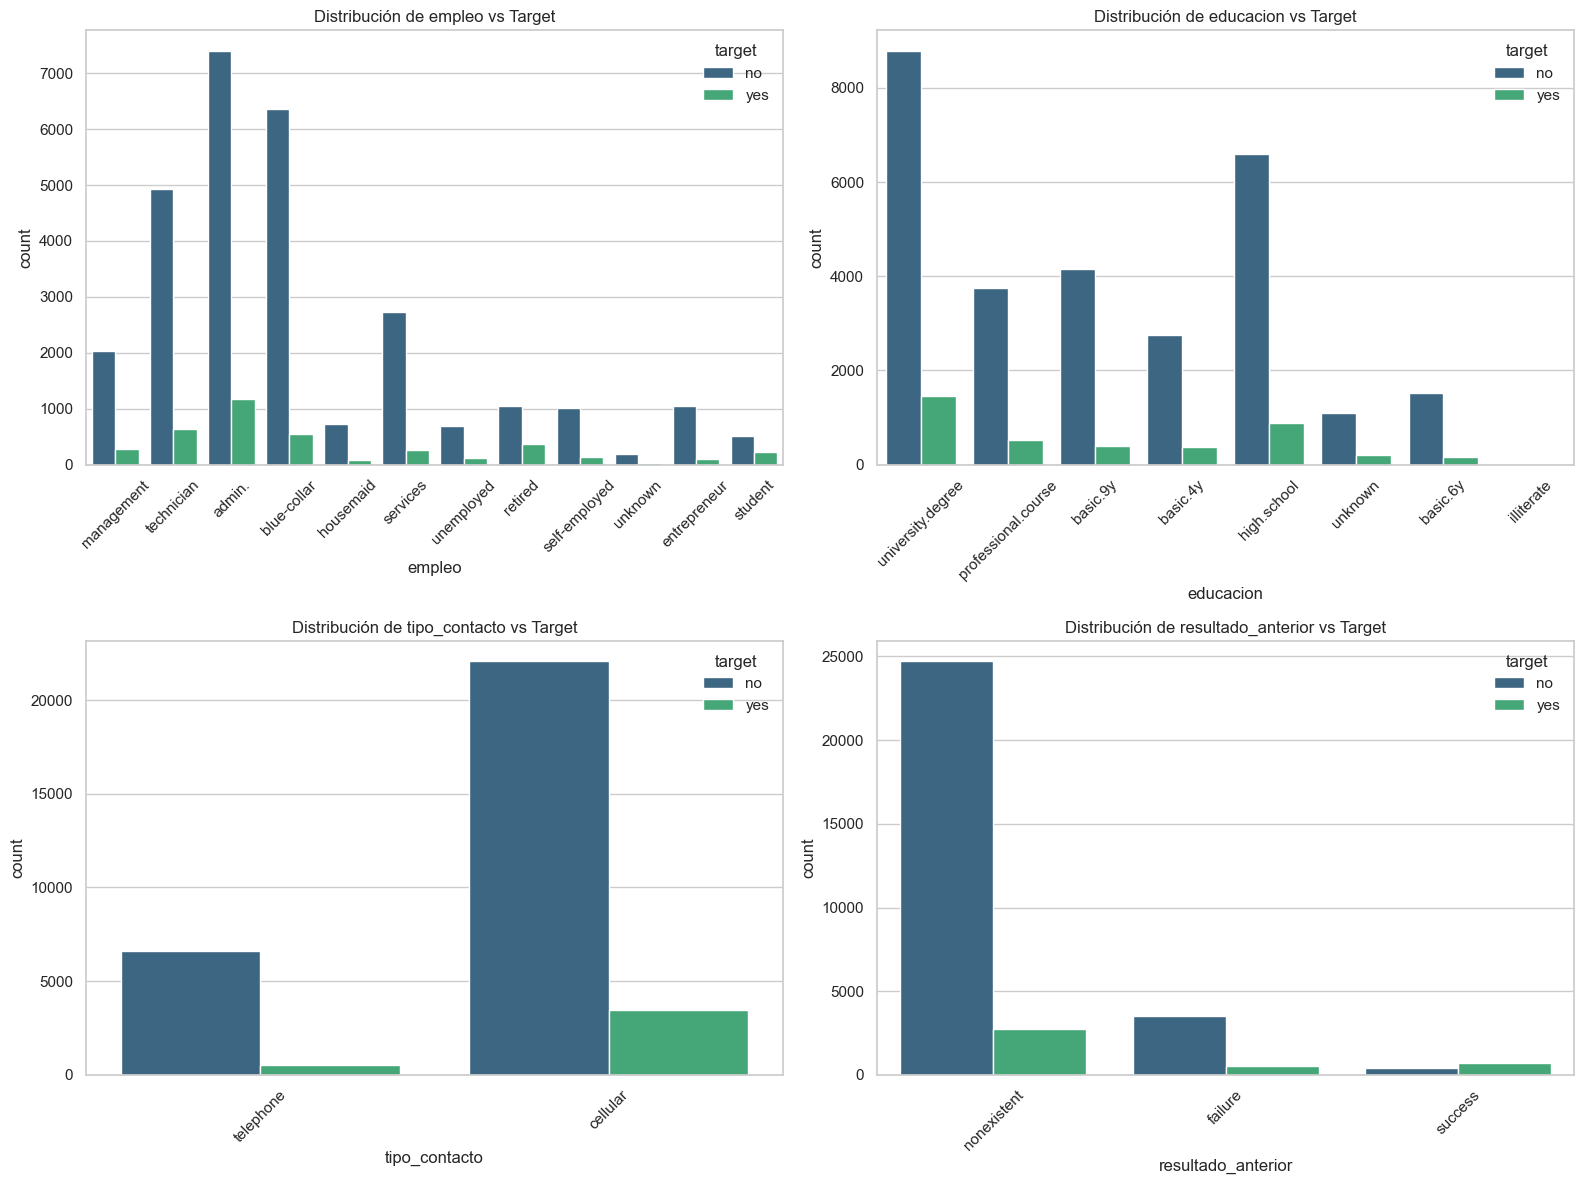

In [684]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set_theme(style="whitegrid")

# Visualizamos las 4 variables categóricas más importantes respecto al target
cols_to_plot = ['empleo', 'educacion', 'tipo_contacto', 'resultado_anterior']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flat

          
for i, col in enumerate(cols_to_plot):
    sns.countplot(data=data_train, x=col, hue='target', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de {col} vs Target', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

A partir del análisis visual de las variables categóricas frente a la variable objetivo (contratación), se observan patrones relevantes para la predicción del crédito. En la variable empleo, los perfiles administrativos, técnicos y de servicios concentran el mayor número de contrataciones, lo que sugiere una mayor propensión en ocupaciones formales. Respecto a la educación, los clientes con nivel universitario y secundaria muestran más respuestas positivas, indicando que un mayor nivel educativo podría asociarse a una mayor contratación. En cuanto al tipo de contacto, el contacto por teléfono móvil resulta claramente más efectivo que el teléfono fijo. Finalmente, el resultado de campañas anteriores es altamente discriminante, ya que los clientes con éxito previo presentan una tasa de contratación significativamente superior.

## 3. Procesamiento del dataset

In [685]:
#1. LIMPIEZA DE DUPLICADOS (Sincronizada para evitar desalineación de Y)
# Limpiamos los dataframes originales primero
data_train_clean = data_train.drop_duplicates(keep='first').copy()
data_test_clean = data_test.drop_duplicates(keep='first').copy()

In [ ]:
# 2. SEPARACIÓN DE TARGET (Y)
y_train = (data_train_clean['target_num'] == 'yes').astype(int)
y_test = (data_test_clean['target_num'] == 'yes').astype(int)

In [ ]:
# 3. CREACIÓN DE SETS DE PREPARACIÓN (X sin la columna target_num)
train_prep = data_train_clean.drop('target_num', axis=1).copy()
test_prep = data_test_clean.drop('target_num', axis=1).copy()

In [702]:
# 4. DEFINICIÓN DE CARACTERÍSTICAS
# Excluimos explícitamente la variante de 'target' de las categoricas
num_features = train_prep.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = ['empleo', 'estado', 'educacion', 'impago', 'hipoteca', 'prestamo', 'tipo_contacto', 'mes', 'dia_semana', 'resultado_anterior']

print(num_features)

['edad', 'contactos_actual', 'contactos_anterior', 'tasa_var_empleo_3m', 'euribor_3m', 'ipc_1m']


In [703]:
# 5. ESCALADO DE VARIABLES NUMÉRICAS
scaler = StandardScaler()
# Escalamos directamente sobre los dataframes prep
train_prep[num_features] = scaler.fit_transform(train_prep[num_features])
test_prep[num_features] = scaler.transform(test_prep[num_features])

In [704]:
# 6. ONE-HOT ENCODING (Asegura mismas columnas en Train y Test)
from sklearn import preprocessing as prep
encoder = prep.OneHotEncoder(sparse_output=False, 
                             min_frequency=0.05, 
                             handle_unknown='infrequent_if_exist')

# Ajustamos con Train y transformamos ambos
X_train_cat = encoder.fit_transform(train_prep[cat_features])
X_test_cat = encoder.transform(test_prep[cat_features])

# Convertimos a DataFrames con nombres de columnas
onehot_train = pd.DataFrame(X_train_cat, 
                            columns=encoder.get_feature_names_out(cat_features), 
                            index=train_prep.index)
onehot_test = pd.DataFrame(X_test_cat, 
                           columns=encoder.get_feature_names_out(cat_features), 
                           index=test_prep.index)

In [ ]:
# 7. ENSAMBLAJE FINAL (X_train y X_test con 100% de coincidencia de columnas)
X_train = pd.concat([train_prep[num_features], onehot_train], axis=1)
X_test = pd.concat([test_prep[num_features], onehot_test], axis=1)

print("\n✅ PROCESAMIENTO COMPLETADO EXITOSAMENTE")
print(f" X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f" X_test:  {X_test.shape} | y_test:  {y_test.shape}")

# Verificación de que no hay nulos ni objetos
if X_train.isnull().sum().sum() == 0 and X_train.select_dtypes(include='object').empty:
    print(" Los datos están limpios, escalados y listos para modelar.")


✅ PROCESAMIENTO COMPLETADO EXITOSAMENTE
📊 X_train: (31099, 49) | y_train: (31099,)
📊 X_test:  (8294, 49) | y_test:  (8294,)
💎 Los datos están limpios, escalados y listos para modelar.
